Task 1

In [71]:
import sys
#sys.path.append("../code")
import registration_util as util

I_path = 'image_data/1_1_t1.tif'
Im_path = 'image_data/1_1_t1_d.tif'

X, Xm = util.cpselect(I_path, Im_path)

print('X:\n{}'.format(X))
print('Xm:\n{}'.format(Xm))

X:
[[147.68064516]
 [ 47.18258065]]
Xm:
[[166.14516129]
 [ 53.56967742]]


Task 2

In [13]:
import registration_project as project

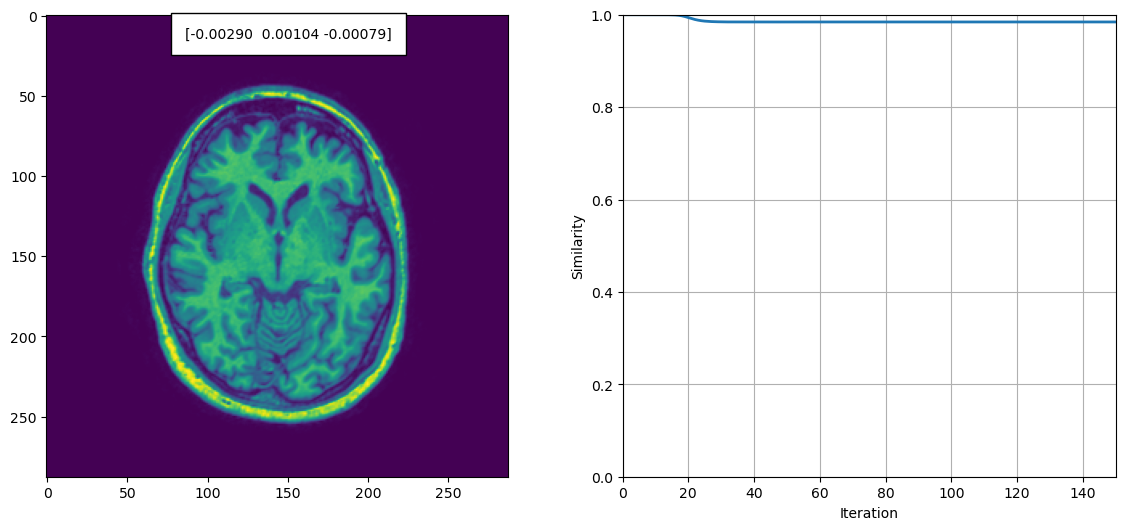

In [35]:
#1) Rigid intensity-based registration of two T1 slices (e.g. 1_1_t1.tif and 1_1_t1_d.tif) using 
# #normalized cross-correlation as a similarity measure.
print('This is experiment 1:')
project.intensity_based_registration_demo(I_path='./image_data/1_1_t1.tif', Im_path='./image_data/1_1_t1_d.tif',
                                  mu=0.0007, num_iter=150, rigid=True, corr_metric="CC")


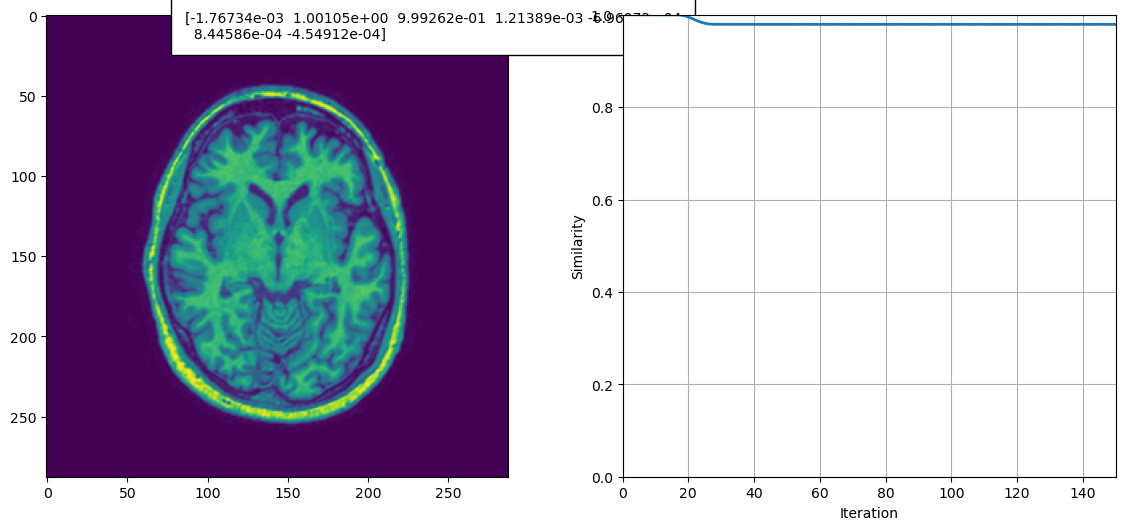

In [62]:
#2) Affine intensity-based registration of two T1 slices (e.g. 1_1_t1.tif and 1_1_t1_d.tif) using 
# normalized cross-correlation as a similarity measure.
print('This is experiment 2')
project.intensity_based_registration_demo(I_path='./image_data/1_1_t1.tif', Im_path='./image_data/1_1_t1_d.tif',mu=0.0004,num_iter=150,rigid=False,corr_metric='CC')


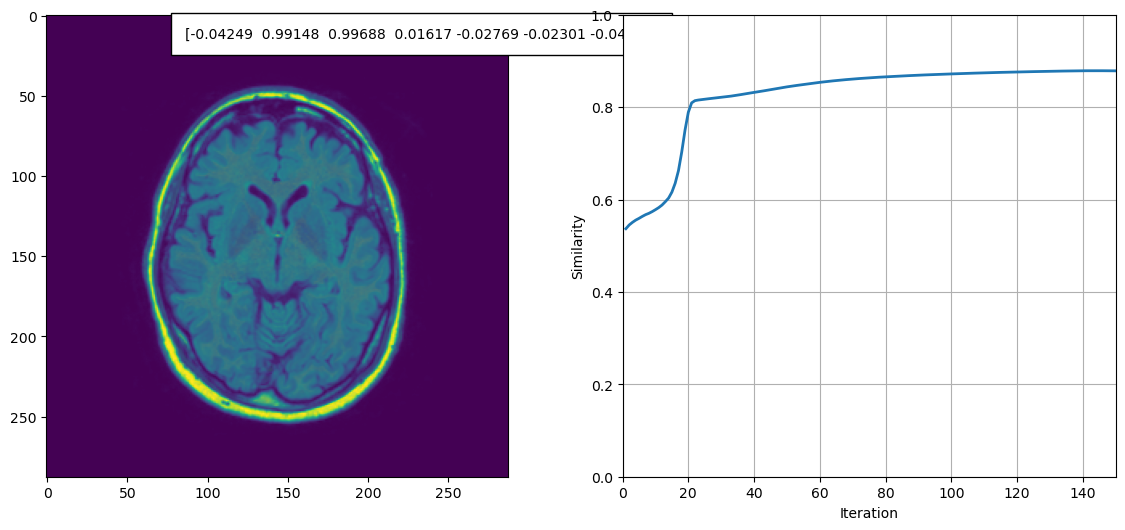

In [60]:
#3) Affine intensity-based registration of a T1 and a T2 slice (e.g. 1_1_t1.tif and 1_1_t2.tif) using 
# normalized cross-correlation as a similarity measure.
print('This is experiment 3')
project.intensity_based_registration_demo(I_path='./image_data/1_1_t1.tif',Im_path='./image_data/1_1_t2.tif',mu=0.0005,num_iter=150,rigid=False,corr_metric='CC')

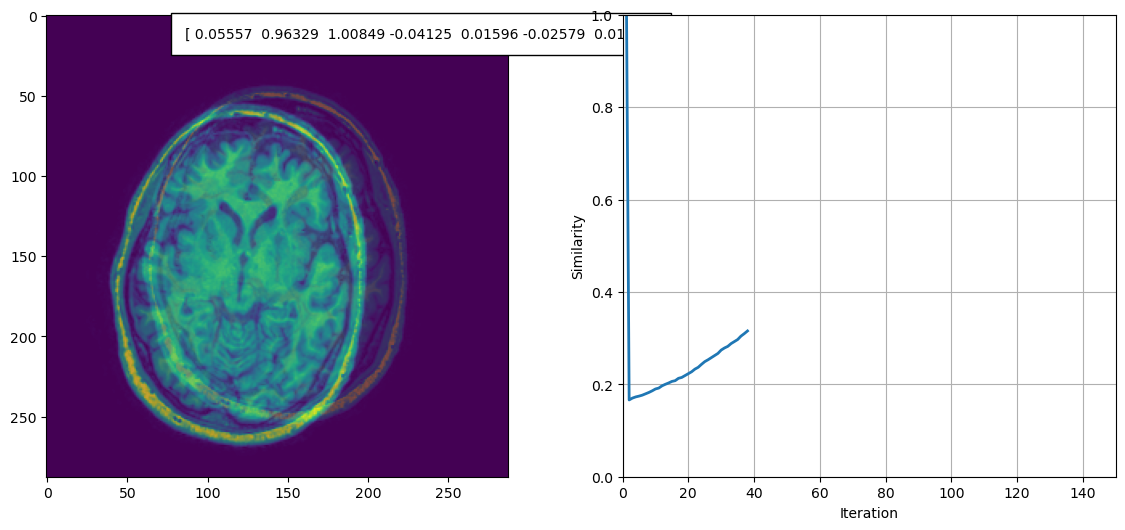

KeyboardInterrupt: 

In [66]:
#4)Affine intensity-based registration of two T1 slices (e.g. 1_1_t1.tif and 1_1_t1_d.tif) using
#  mutual information as a similarity measure.
print('This is experiment 4')
project.intensity_based_registration_demo(I_path='./image_data/1_1_t1.tif', Im_path='./image_data/1_1_t1_d.tif',mu=0.0007, num_iter=150, rigid=False, corr_metric="MI")

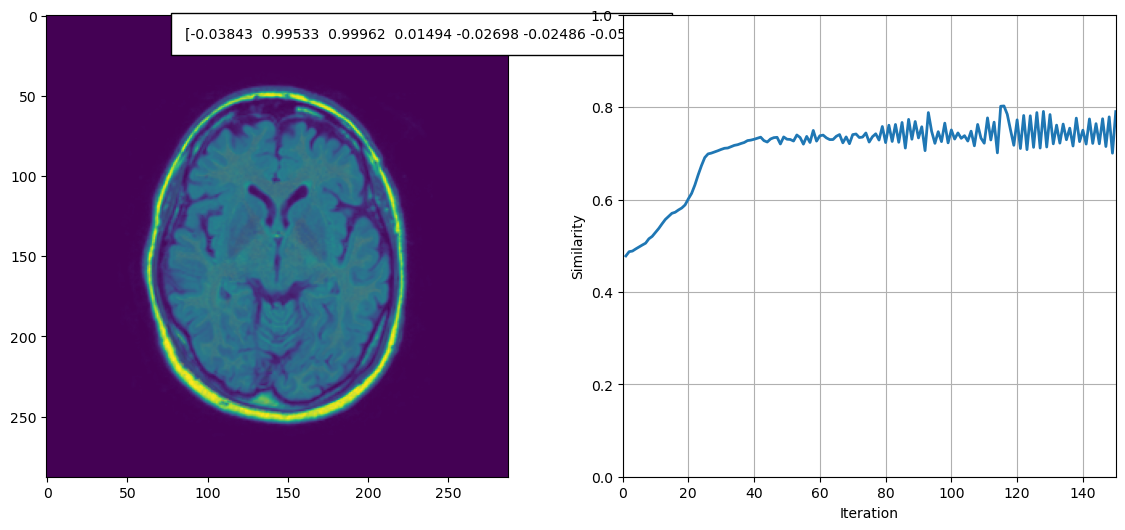

In [69]:
#5)Affine intensity-based registration of a T1 slice and a T2 slice (e.g. 1_1_t1.tif and 1_1_t2.tif) using 
# mutual information as a similarity measure.
print('This is experiment 5')
project.intensity_based_registration_demo(I_path='./image_data/1_1_t1.tif', Im_path='./image_data/1_1_t2.tif',mu=0.0005, num_iter=150, rigid=False, corr_metric="MI")


Analysis:


Bij 1: Rigid intensity-based registration of two T1 slices met NCC
    met num_iter = 150, mu = 0.0005 krijg je geen grafiek in beeld, mu = 0.001 een woort eindeloze grafiek bovenin beeld die periodiek alleen maar heel snel omhoog en omlaag gaat. mu=0.002 hetzelfde maar iets groter. num_iter naar 100 verandert weinig lijkt het (de frequentie missschien alleen)
    Bij al deze instellingen was er geen volle rotatie, alleen maar oscillatie tussen 2 punten. mu verlagen naar 0.0001 zorgt voor een rechte lijn in de grafiek.
    mu=0.005 geeft veel meer info, de grafiek is niet meer alleen een symmetrische oscillatie en de afbeelding 'beweegt'ook meer, wel nog steeds een oscillatie. Bij 0.006 staan de pieken iets verder uit elkaar.
    0.01 heeft nog steeds oscillatie, maar weer iets verder uit elkaar.
    mu=0.1 is duidelijk te hoioog, dan krijg je nan values uit.
    Bij 0.05 oscillatie, bij 0.06 gaat de grafiek al 'uit beeld'.
    0.0001 te klein, geen grafiek, 0.005 rechte lijn, ook te klein.
    0.0007 is de eerste waar geen rechte lijn is, hier is het een kleine daling en dan een rechte lijn.
    Bij 0.0008 is er al fluctuatie, wat wijst op een te hoge mu, dus hier is de beste mu waarschijnlijk 0.0007, maar dit lijkt wel vrij weinig info te geven. 


Bij 2: Affine intensity-based registration of two T1 slices met NCC
    mu=0.0005 zorgt al voor fluctuatie.
    0.0004 geeft kleine afname en dan steady lijn.
    0.00045 geeft al fluctuatie, dus ook al te hoog. 
    0.00035 geeft te weinig info -> 0.0004 is het best.
    met 0.0004:
    num_iter = 160 geeft zelfde resultaat
    170,180,190, 200 en 300 ook
    100 ook -> op 150 houden
    
Bij 3:Affine intensity-based registration of a T1 and a T2 slice with NCC
    mu = 0.005 en num_iter = 150: veel fluctuatie 
    mu = 0.004 ook te hoog
    mu = 0.001 -> eerst toename, dan fluctuatie rond hetzeflde punt -> jeeej
    mu = 0.0009 -> zeflde, al kleinere fluctuatie
    mu = 0.0008 -> stijging met nog miniscule fluctuatie
    mu = 0.0007 -> eogenlijk zelfde als bij 0.0008
    (na de stijging werd het stukje  'plateau' voor de fluctuatie steeds iets breder/gerekter)
    mu = 0.0005 -> perfecto
    mu = 0.0004 -> zelfde als mu = 0.005 (waardes:-0.04287 0.99048 0.99593 0.01479 -0.02977 -0.01757)